# Lab | Model generation and validation

In [1]:
import pandas as pd
import numpy as np
marketing_customer_analysis = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
marketing_customer_analysis

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# Linear regression

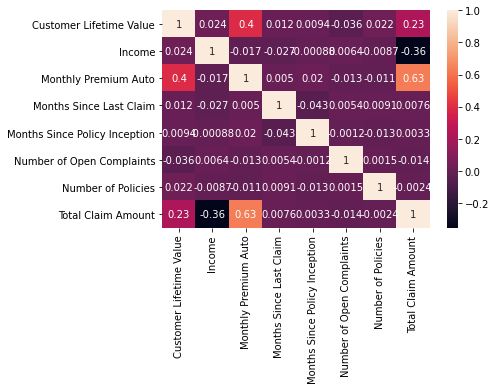

The numerical columns selected will be Monthly Premium Auto, Income and Customer Lifetime Value, because these are the columns that have the highest correlation with Total Claim Amount and doesn't suffer from multicollinearity (neither Monthly Premium Auto nor Customer Lifetime Value will be dropped, as 0.4 isn't generally considered a sufficiently high correlation coefficient that indicates the presence of multicollinearity). The other numerical columns have a too low correlation with Total Claim Amount. 


In [2]:
# Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = marketing_customer_analysis.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
print("The numerical columns selected will be Monthly Premium Auto, Income and Customer Lifetime Value, because these are the columns that have the highest correlation with Total Claim Amount and doesn't suffer from multicollinearity (neither Monthly Premium Auto nor Customer Lifetime Value will be dropped, as 0.4 isn't generally considered a sufficiently high correlation coefficient that indicates the presence of multicollinearity). The other numerical columns have a too low correlation with Total Claim Amount. ")

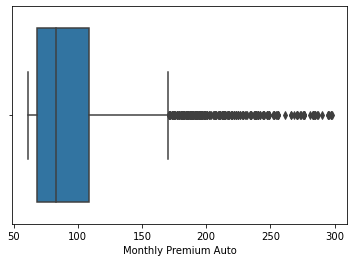

In [3]:
# Remove outliers
sns.boxplot(x=marketing_customer_analysis['Monthly Premium Auto'])
plt.show()

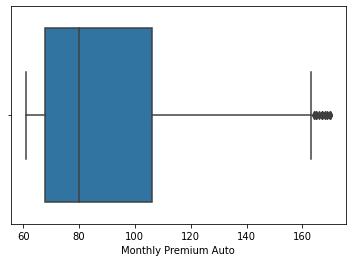

In [4]:
iqr = np.percentile(marketing_customer_analysis['Monthly Premium Auto'],75) - np.percentile(
    marketing_customer_analysis['Monthly Premium Auto'],25)
upper_wisker = np.percentile(marketing_customer_analysis['Monthly Premium Auto'],75) + 1.5*iqr
lower_wisker = np.percentile(marketing_customer_analysis['Monthly Premium Auto'],25) - 1.5*iqr
marketing_customer_analysis = marketing_customer_analysis[(marketing_customer_analysis['Monthly Premium Auto']>lower_wisker) & 
                                                          (marketing_customer_analysis['Monthly Premium Auto']<upper_wisker)]
sns.boxplot(x=marketing_customer_analysis['Monthly Premium Auto'])
plt.show()

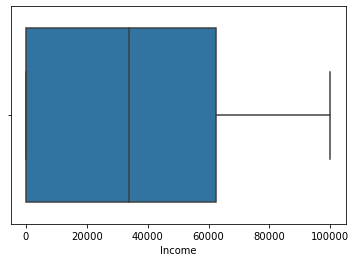

In [5]:
sns.boxplot(x=marketing_customer_analysis['Income'])
plt.show()

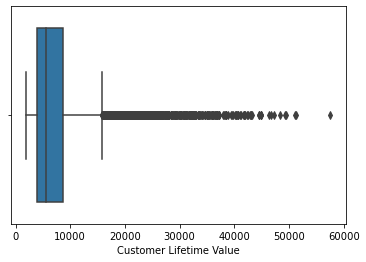

In [6]:
sns.boxplot(x=marketing_customer_analysis['Customer Lifetime Value'])
plt.show()

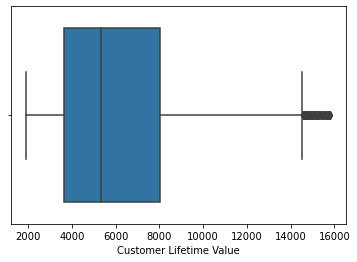

In [7]:
iqr = np.percentile(marketing_customer_analysis['Customer Lifetime Value'],75) - np.percentile(
    marketing_customer_analysis['Customer Lifetime Value'],25)
upper_wisker = np.percentile(marketing_customer_analysis['Customer Lifetime Value'],75) + 1.5*iqr
lower_wisker = np.percentile(marketing_customer_analysis['Customer Lifetime Value'],25) - 1.5*iqr
marketing_customer_analysis = marketing_customer_analysis[(marketing_customer_analysis['Customer Lifetime Value']>lower_wisker) 
                                                          & (marketing_customer_analysis['Customer Lifetime Value']<upper_wisker)]
sns.boxplot(x=marketing_customer_analysis['Customer Lifetime Value'])
plt.show()

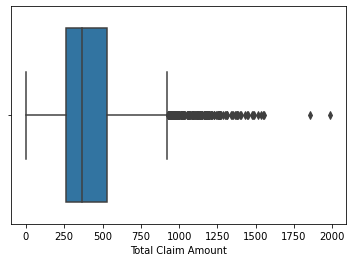

In [8]:
sns.boxplot(x=marketing_customer_analysis['Total Claim Amount'])
plt.show()

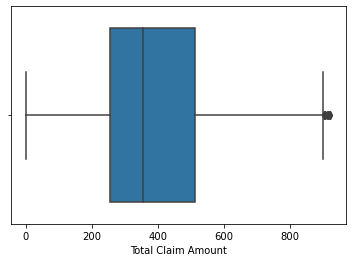

In [9]:
iqr = np.percentile(marketing_customer_analysis['Total Claim Amount'],75) - np.percentile(
    marketing_customer_analysis['Total Claim Amount'],25)
upper_wisker = np.percentile(marketing_customer_analysis['Total Claim Amount'],75) + 1.5*iqr
lower_wisker = np.percentile(marketing_customer_analysis['Total Claim Amount'],25) - 1.5*iqr
marketing_customer_analysis = marketing_customer_analysis[(marketing_customer_analysis['Total Claim Amount']>lower_wisker) & 
                                                          (marketing_customer_analysis['Total Claim Amount']<upper_wisker)]
sns.boxplot(x=marketing_customer_analysis['Total Claim Amount'])
plt.show()

In [10]:
# X-y split. (define which column you want to predict, and which ones you will use to make the prediction)
y = marketing_customer_analysis['Total Claim Amount']
X = marketing_customer_analysis.drop(['Total Claim Amount', 'Months Since Last Claim', 'Months Since Policy Inception', 
                                      'Number of Open Complaints', 'Number of Policies'], axis=1)

In [11]:
# Use the Train-test split to create the Train, and Test sets (make sure to set the random_state option to any integer number 
# of your choice).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [12]:
# Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained in the 
# previous step (make sure to use the columns= option to set the columns names to X.columns).
print("The previous step already returns Pandas DataFrames.")
X_train

The previous step already returns Pandas DataFrames.


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,PP97061,Nevada,4282.947971,Yes,Basic,College,2/26/11,Employed,F,40864,Rural,Married,109,Personal Auto,Personal L3,Offer1,Agent,SUV,Medsize
1,DF97701,Oregon,7069.740965,No,Extended,Bachelor,2/8/11,Employed,F,63867,Suburban,Married,89,Corporate Auto,Corporate L3,Offer3,Branch,Four-Door Car,Medsize
2,CV86445,Arizona,8139.525579,No,Basic,High School or Below,1/12/11,Employed,M,86876,Rural,Married,68,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
3,CA55066,Arizona,12157.329920,Yes,Premium,High School or Below,2/27/11,Employed,M,57449,Suburban,Single,103,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize
4,DJ93289,California,4887.344366,No,Basic,High School or Below,2/26/11,Employed,F,66707,Rural,Married,61,Personal Auto,Personal L3,Offer4,Agent,Two-Door Car,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,JP52554,California,15550.190770,No,Basic,Bachelor,1/25/11,Medical Leave,F,17449,Urban,Divorced,71,Corporate Auto,Corporate L1,Offer3,Agent,Four-Door Car,Medsize
6202,ZF64287,California,13081.307700,No,Basic,High School or Below,2/16/11,Employed,M,89948,Rural,Divorced,110,Special Auto,Special L2,Offer2,Agent,Sports Car,Medsize
6203,TS53809,Oregon,7098.914140,No,Basic,Bachelor,2/7/11,Unemployed,M,0,Suburban,Single,70,Personal Auto,Personal L1,Offer1,Agent,Two-Door Car,Medsize
6204,MU67498,California,7200.664877,Yes,Basic,College,1/26/11,Unemployed,F,0,Suburban,Married,66,Corporate Auto,Corporate L2,Offer2,Agent,Four-Door Car,Medsize


In [13]:
# Split the X_train Pandas DataFrame into two: numerical, and categorical using df.select_dtypes().
X_num_train = X_train.select_dtypes(include = np.number)
X_cat_train = X_train.select_dtypes(include = object)

X_num_test = X_test.select_dtypes(include = np.number)
X_cat_test = X_test.select_dtypes(include = object)

In [14]:
# If you need to transform any column, Train your transformers and/or scalers all the numerical columns using the .fit() only 
# in the Train set (only one transformer/scaler for all the columns, check here, and here using the .transform()
display(X_num_train.skew())
print("There is no need to transform the columns because their skewness is inside the range [-2,2].")

Customer Lifetime Value    0.933291
Income                     0.261054
Monthly Premium Auto       0.816890
dtype: float64

There is no need to transform the columns because their skewness is inside the range [-2,2].


In [15]:
display(X_num_train.describe())
print("The ranges of the columns are very different, so a scaler needs to be applied.")

,Customer Lifetime Value,Income,Monthly Premium Auto
count,6206.000000,6206.000000,6206.000000
mean,6026.607693,38569.145988,85.779729
std,3049.762420,30317.402326,21.888877
min,1898.007675,0.000000,61.000000
25%,3560.730064,12206.250000,67.000000
50%,5318.896640,35006.000000,77.000000
75%,7983.922782,63213.000000,103.000000
max,15808.757570,99981.000000,170.000000


The ranges of the columns are very different, so a scaler needs to be applied.


In [16]:
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler = MinMaxScaler()

scaler.fit(X_num_train) # fit() Determine the min and the max of each column in the TRAIN set

# Save all your transformers/scalers right after the .fit() using pickle using the code shown below:
import os
import pickle

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "min_max_scaler.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file) # Replace "variable" with the name of the variable that contains your transformer

X_num_train_scaled = scaler.transform(X_num_train) # .transform() applies the transformation x_normalized will be np.array
X_num_test_scaled  = scaler.transform(X_num_test) # .transform() applies the transformation x_normalized will be np.array

In [17]:
# If you used a transformer/scaler in the previous step, create new Pandas DataFrames from the Numpy arrays generated by the 
# .transform() using the pd.DataFrame() function as you did earlier with the Numpy arrays generated by the train_test_split() 
# function.
X_num_train_scaled_df = pd.DataFrame(X_num_train_scaled, columns=X_num_train.columns)
X_num_test_scaled_df  = pd.DataFrame(X_num_test_scaled,  columns=X_num_test.columns)
X_num_train_scaled_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto
0,0.171446,0.408718,0.440367
1,0.371780,0.638791,0.256881
2,0.448683,0.868925,0.064220
3,0.737510,0.574599,0.385321
4,0.214894,0.667197,0.000000


In [18]:
# Transform the categorical columns into numbers using a:
# OneHotEncoder for categorical nominal columns.

# Separation of the categorical nominal columns from the categorical ordinal.

X_cat_train = X_cat_train.drop(['Customer','Effective To Date'], axis=1)
X_cat_test = X_cat_test.drop(['Customer','Effective To Date'], axis=1)

X_cat_train_nominal = X_cat_train.drop(['Coverage','Education','Vehicle Size'], axis=1)
X_cat_test_nominal = X_cat_test.drop(['Coverage','Education','Vehicle Size'], axis=1)

X_cat_train_ordinal = X_cat_train[['Coverage','Education','Vehicle Size']]
X_cat_test_ordinal = X_cat_test[['Coverage','Education','Vehicle Size']]

In [19]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop='if_binary', sparse=False)

one_hot_encoder.fit(X_cat_train_nominal)

path = "encoders/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "one_hot_encoder.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(one_hot_encoder, file) # Replace "variable" with the name of the variable that contains your transformer

X_cat_train_nom_encoded = one_hot_encoder.transform(X_cat_train_nominal)
X_cat_test_nom_encoded = one_hot_encoder.transform(X_cat_test_nominal)

X_cat_train_nom_encoded_df = pd.DataFrame(X_cat_train_nom_encoded, 
                                          columns=one_hot_encoder.get_feature_names(X_cat_train_nominal.columns))
X_cat_test_nom_encoded_df = pd.DataFrame(X_cat_test_nom_encoded, 
                                         columns=one_hot_encoder.get_feature_names(X_cat_test_nominal.columns))

In [20]:
# Use .replace() to cast into numbers any categorical ordinal column replacing each label with a number that: respects the 
# order of the labels and the relative "distance"
X_cat_train_ordinal['Coverage'].value_counts()

Basic       3947
Extended    1797
Premium      462
Name: Coverage, dtype: int64

In [21]:
X_cat_train_ordinal['Coverage'] = X_cat_train_ordinal['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium':2})
X_cat_test_ordinal['Coverage'] = X_cat_test_ordinal['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium':2})
X_cat_train_ordinal['Coverage'].value_counts()

<ipython-input-21-51ed709dde24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_train_ordinal['Coverage'] = X_cat_train_ordinal['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium':2})
<ipython-input-21-51ed709dde24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_test_ordinal['Coverage'] = X_cat_test_ordinal['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium':2})


0    3947
1    1797
2     462
Name: Coverage, dtype: int64

In [22]:
X_cat_train_ordinal['Education'].value_counts()

Bachelor                1871
College                 1838
High School or Below    1749
Master                   513
Doctor                   235
Name: Education, dtype: int64

In [23]:
X_cat_train_ordinal['Education'] = X_cat_train_ordinal['Education'].replace({'High School or Below':0, 'Bachelor':1, 
                                                                             'College':2, 'Master':3, 'Doctor':4})
X_cat_test_ordinal['Education'] = X_cat_test_ordinal['Education'].replace({'High School or Below':0, 'Bachelor':1, 
                                                                             'College':2, 'Master':3, 'Doctor':4})
X_cat_train_ordinal['Education'].value_counts()

<ipython-input-23-bb6a08b6c991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_train_ordinal['Education'] = X_cat_train_ordinal['Education'].replace({'High School or Below':0, 'Bachelor':1,
<ipython-input-23-bb6a08b6c991>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_test_ordinal['Education'] = X_cat_test_ordinal['Education'].replace({'High School or Below':0, 'Bachelor':1,


1    1871
2    1838
0    1749
3     513
4     235
Name: Education, dtype: int64

In [24]:
X_cat_train_ordinal['Vehicle Size'].value_counts()

Medsize    4356
Small      1209
Large       641
Name: Vehicle Size, dtype: int64

In [25]:
X_cat_train_ordinal['Vehicle Size'] = X_cat_train_ordinal['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
X_cat_test_ordinal['Vehicle Size'] = X_cat_test_ordinal['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
X_cat_train_ordinal['Vehicle Size'].value_counts()

<ipython-input-25-c1301b1f7f35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_train_ordinal['Vehicle Size'] = X_cat_train_ordinal['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
<ipython-input-25-c1301b1f7f35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_test_ordinal['Vehicle Size'] = X_cat_test_ordinal['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})


1    4356
0    1209
2     641
Name: Vehicle Size, dtype: int64

In [26]:
# Concat numerical_transformer and categorical_transfomed DataFrames using pd.concat().
# Concat ordinal train DataFrame with nominal train DataFrame
X_cat_train_transformed = pd.concat([X_cat_train_nom_encoded_df, X_cat_train_ordinal], axis=1)
X_cat_train_transformed

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,Education,Vehicle Size
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,1
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1
6202,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1
6203,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1
6204,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2,1


In [27]:
# Concat numeric train DataFrame with categorical train DataFrame
X_train_transformed = pd.concat([X_num_train_scaled_df, X_cat_train_transformed], axis=1)
X_train_transformed

,Customer Lifetime Value,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Disabled,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,Education,Vehicle Size
0,0.171446,0.408718,0.440367,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2,1
1,0.371780,0.638791,0.256881,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
2,0.448683,0.868925,0.064220,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,1
3,0.737510,0.574599,0.385321,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,1
4,0.214894,0.667197,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,0.981412,0.174523,0.091743,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1
6202,0.803932,0.899651,0.449541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1
6203,0.373877,0.000000,0.082569,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1
6204,0.381191,0.000000,0.045872,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2,1


In [28]:
# Concat ordinal test DataFrame with nominal test DataFrame
X_cat_test_transformed = pd.concat([X_cat_test_nom_encoded_df, X_cat_test_ordinal], axis=1)
X_cat_test_transformed

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,Education,Vehicle Size
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,2,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,3,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,2
1548,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2
1549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2,1
1550,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2,1


In [29]:
# Concat numeric test DataFrame with categorical test DataFrame
X_test_transformed = pd.concat([X_num_test_scaled_df, X_cat_test_transformed], axis=1)
X_test_transformed

,Customer Lifetime Value,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Disabled,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,Education,Vehicle Size
0,0.064505,0.000000,0.119266,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,2,1
1,0.171288,0.526890,0.449541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,1
2,0.388532,0.304978,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,3,1
3,0.383555,0.945680,0.266055,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0
4,0.876010,0.749302,0.009174,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,0.216078,0.000000,0.045872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,2
1548,0.347185,0.394355,0.211009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2
1549,0.851646,0.408178,0.486239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2,1
1550,0.551900,0.000000,0.669725,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2,1


In [30]:
# Apply another MinMaxScaler to the concatenated DataFrame.
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler2 = MinMaxScaler()

scaler2.fit(X_train_transformed) # fit() Determine the min and the max of each column in the TRAIN set

path = "scalers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "min_max_scaler2.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(scaler2, file) # Replace "variable" with the name of the variable that contains your transformer

X_train_scaled = scaler2.transform(X_train_transformed) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled  = scaler2.transform(X_test_transformed)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_transformed.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_transformed.columns)

In [31]:
# Apply linear regression to the Pandas DataFrame obtained in the previous step using sklearn
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df, y_train) # If we has to transform y_train, we will use .fit(X_train_scaled_df, y_train_transformed)

path = "models/"
    # Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
      # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "linear_model.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(linear_model, file) # Replace "variable" with the name of the variable that contains your transformer
        
y_train_pred = linear_model.predict(X_train_scaled_df)
y_test_pred  = linear_model.predict(X_test_scaled_df)

results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,166.937747,164.0
1,Train,432.361631,459.0
2,Train,118.810361,36.0
3,Train,494.400000,550.0
4,Train,71.980757,-9.0


# Model Validation

In [32]:
# Compute the following metrics for your Train and Test sets:
# R2.
# MSE.
# RMSE
# MAE.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean absolute error
MAE_train = mean_absolute_error(results_df[results_df["Set"]=="Train"]["Real"], 
                                results_df[results_df["Set"]=="Train"]["Predicted"])
MAE_test  = mean_absolute_error(results_df[results_df["Set"]=="Test"]["Real"],  
                                results_df[results_df["Set"]=="Test"]["Predicted"])

# Mean squared error
MSE_train = mean_squared_error(results_df[results_df["Set"]=="Train"]["Real"], 
                               results_df[results_df["Set"]=="Train"]["Predicted"])
MSE_test  = mean_squared_error(results_df[results_df["Set"]=="Test"]["Real"],  
                               results_df[results_df["Set"]=="Test"]["Predicted"])

# Root mean squared error
RMSE_train = mean_squared_error(results_df[results_df["Set"]=="Train"]["Real"], 
                                results_df[results_df["Set"]=="Train"]["Predicted"], squared=False)
RMSE_test  = mean_squared_error(results_df[results_df["Set"]=="Test"]["Real"],  
                                results_df[results_df["Set"]=="Test"]["Predicted"], squared=False)

# R2
R2_train = r2_score(results_df[results_df["Set"]=="Train"]["Real"], results_df[results_df["Set"]=="Train"]["Predicted"])
R2_test  = r2_score(results_df[results_df["Set"]=="Test"]["Real"],  results_df[results_df["Set"]=="Test"]["Predicted"])

In [33]:
# Create a Pandas DataFrame to summarize the error metrics for the Train and Test sets.
metrics = {"Metric": ['MAE','MSE','RMSE','R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

metrics_df = pd.DataFrame(metrics).round(2)
metrics_df

,Metric,Train,Test
0,MAE,70.45,72.23
1,MSE,8318.63,9170.11
2,RMSE,91.21,95.76
3,R2,0.79,0.78
